In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem1 
### Simple case
#### single pulse converted to gate operation in rotating frame
$$
H_{rf,d}(t)=-\frac{1}{2}\Omega V_0 S_{\theta}(t)
\begin{pmatrix}
0 & e^{i(\delta\omega t+\phi)} \\
e^{-i(\delta\omega t+\phi)} & 0 
\end{pmatrix} \qquad (90)
$$

$$
H_{rf,d}(t)=-\frac{\Omega}{2}V_0 S_{\theta}(t) \Big[ \cos(\delta\omega t+\phi)\sigma_x-\sin(\delta\omega t+\phi)\sigma_y \Big] \quad (1)
$$

$$
\frac{\partial}{\partial t}U(t) = -\frac{i}{\hbar}H(t)U(t) \quad(2)
$$

$$
U=\hat{T}\exp{({-i/{\hslash}\int_0^t \tilde{H_d}(t')dt'})} \quad (3)
$$

The solution for U in (2) is time-ordered exponential (3)

(90) is the driving hamiltonian in rotating frame

아래와 같은 방식으로 $U(t)$를 계산하면 자동적으로 time-ordering을 만족한다

$$U(t_{n+1})= U(t_n)+\frac{dU}{dt}|_{t_n}\Delta t $$
$$\frac{dU}{dt}=-\frac{i}{\hbar}H(t)U(t)$$

In [135]:
#time_step=1e-4

def make_U(H, time_step):
    """
    PARAMETER
        Hamiltonian : function of t
        time_step : float
    RETURNS
        U : function of t
    """
    hbar = 1.
    I = np.identity(2,dtype="complex128")
    
    def U(t):
        total = I #U(t=0)
        check = [I]
        times = np.arange(start=0,stop=t,step=time_step)
        for t in times[1:]:
            derivative = (-1j/hbar)*np.matmul(H(t),total)*time_step
            total = total + derivative
            check.append(total) 
        return total, np.array(check)
        

    return U

total += derivative이 total=total + derivative 이랑 똑같아야 하는거 아닌가 이해가안가네 

In [136]:
I = np.identity(2,dtype="complex128")
time_step=1e-4
hbar=1.

In [137]:
def make_H_d(Omega,V_0,delta_omega,phi,s):
    """
    PARAMETER
        -s:function 
    RETURN 
        -H: time-dependent Hamiltonian (has to be Hermitian)
    """ 
    
    def H(t):
        matrix=np.zeros((2,2),dtype='complex128')
        matrix[0][1]=np.exp((1j)*(delta_omega*t+phi))
        matrix[1][0]=np.exp((-1j)*(delta_omega*t+phi))
    
        return (-0.5)*Omega*V_0*s(t)*matrix
    
    return H
 

In [ ]:
def make_H_d2(Omega, V_0, delta_omega, phi, s):
    

In [138]:
def s(t):
    return np.sin(t)

In [139]:
testH=make_H_d(Omega=1.,V_0=1.,delta_omega=0.001,phi=0.1,s=s)

In [140]:
testU = make_U(testH,1e-4)

In [141]:
matrix, check = testU(20.)

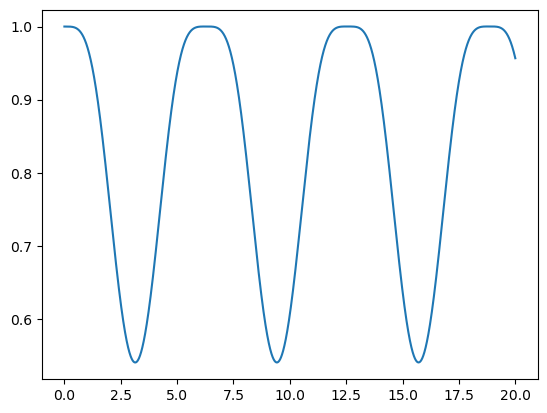

In [143]:
fig, ax =plt.subplots()
fig=plt.plot(np.arange(start=0,stop=20.,step=1e-4), [check[i][0][0] for i in range(200000)])

# Problem 2
## Sequence of pulses converted in to sequence of gate operation
In general matrices does not commute with each other so we need to use time ordering operator $T$

$$U_k...U_1U_ \ = \ T\prod_{n=0}^k \exp \Big[-\frac{i}{\hbar}\int_0^t H^n(t')dt' \Big] $$

계산된 matrix 들은 일반적으로 서로 commute하지 않는다.


In [100]:
sibal =0
for t in range(3):
    sibal+=10

In [101]:
sibal

30